In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")
# print(df_train)
# print(df_test)
X_train = df_train.iloc[:, 1:]
# print(X_train)
y_train = df_train.iloc[:, 0]
# print(y_train)
X_test = df_test.iloc[:, 1:]
# print(X_test)
y_test = df_test.iloc[:, 0]
# print(y_test)
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (1595, 95)
y_train.shape:  (1595,)
X_test.shape:  (399, 95)
y_test.shape:  (399,)


In [17]:
# implement lasso regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
coefficients_num = X_test.shape[1]
iteration = 50
alphas = np.logspace(-2, 4, iteration)
cross_val_errors = np.zeros([iteration])
test_errors = np.zeros([iteration])
coefficients = np.zeros([iteration, coefficients_num])
for i in range(iteration):
    lasso = Lasso(alpha=alphas[i], max_iter=100000)
    # lasso = Lasso(alpha=0.1, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefficients[i, :] = lasso.coef_
    y_pred = cross_val_predict(lasso, X_train, y_train, cv=10)
    cross_val_errors[i] = mean_squared_error(y_train, y_pred)
    y_predict = lasso.predict(X_test)
    test_errors[i] = mean_squared_error(y_test, y_predict)
    print("lambda: %.2f, cross_val_error: %.2f, test_error: %.2f" % (alphas[i], cross_val_errors[i], test_errors[i]))

lambda: 0.01, cross_val_error: 0.02, test_error: 0.02
lambda: 0.01, cross_val_error: 0.02, test_error: 0.02
lambda: 0.02, cross_val_error: 0.02, test_error: 0.02
lambda: 0.02, cross_val_error: 0.02, test_error: 0.02
lambda: 0.03, cross_val_error: 0.02, test_error: 0.02
lambda: 0.04, cross_val_error: 0.02, test_error: 0.03
lambda: 0.05, cross_val_error: 0.03, test_error: 0.03
lambda: 0.07, cross_val_error: 0.03, test_error: 0.03
lambda: 0.10, cross_val_error: 0.03, test_error: 0.04
lambda: 0.13, cross_val_error: 0.04, test_error: 0.04
lambda: 0.17, cross_val_error: 0.05, test_error: 0.06
lambda: 0.22, cross_val_error: 0.05, test_error: 0.06
lambda: 0.29, cross_val_error: 0.05, test_error: 0.06
lambda: 0.39, cross_val_error: 0.05, test_error: 0.06
lambda: 0.52, cross_val_error: 0.05, test_error: 0.06
lambda: 0.69, cross_val_error: 0.05, test_error: 0.06
lambda: 0.91, cross_val_error: 0.05, test_error: 0.06
lambda: 1.21, cross_val_error: 0.05, test_error: 0.06
lambda: 1.60, cross_val_erro

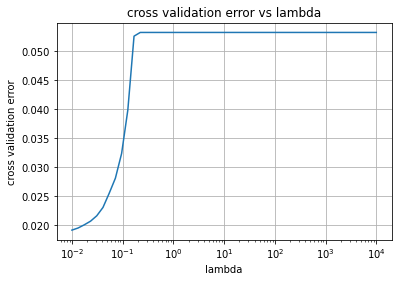

In [24]:
plt.semilogx(alphas, cross_val_errors, label="cross validation error")
plt.title("cross validation error vs lambda")
plt.xlabel("lambda")
plt.ylabel("cross validation error")
plt.grid()
fig = plt.gcf()
plt.show()
fig.savefig("cross_validation_error_vs_lambda.png", format="png")

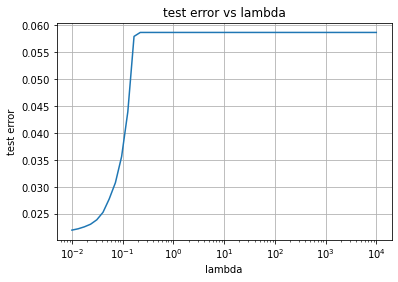

In [19]:
# plot the test error
plt.semilogx(alphas, test_errors, label="test error")
plt.title("test error vs lambda")
plt.xlabel("lambda")
plt.ylabel("test error")
plt.grid()
plt.show()

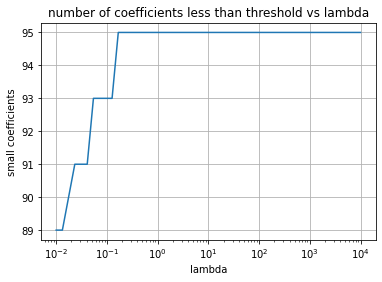

In [20]:
threshold = 1e-2
plt.semilogx(alphas, np.sum(np.abs(coefficients) < threshold, axis=1))
plt.title("number of coefficients less than threshold vs lambda")
plt.xlabel("lambda")
plt.ylabel("small coefficients")
plt.grid()
plt.show()

In [22]:
best_coefficients = coefficients[np.argmin(test_errors)]
max_parameter = np.argmax(best_coefficients)
min_parameter = np.argmin(best_coefficients)
parameter_label = X_test.columns
print("the most positive: ", parameter_label[max_parameter])
print("positive value: ", best_coefficients[max_parameter])
print("the most negative: ", parameter_label[min_parameter])
print("negative value: ", best_coefficients[min_parameter])

the most positive:  PctIlleg
positive value:  0.0687287360561848
the most negative:  PctKids2Par
negative value:  -0.06872331883867289
